> TL, DCNN as feature extractor, feature concatenation, comparison with different classifiers

In [1]:
## data_seg.zip URL: https://drive.google.com/open?id=15Bav4EU2fEKMB76zerubFNIUkJjqy7V2

In [2]:
import numpy as np
import pandas as pd
import csv
label_dict = {}
path = '/home/steve/Desktop/learning-docs/data_science/NMML/leaf_count/img_data/lable.csv'
with open(path,'r')as f:
  data = csv.reader(f)
  for row in data:
        label_dict[row[0]] = int(row[1])
# print(label_dict)

In [3]:
import glob
img_files_tv = [] # train, validation
for files in glob.glob('/home/steve/Desktop/learning-docs/data_science/NMML/leaf_count/img_data/train/*_rgb.png'):
    img_files_tv.append(files)

mask_files_tv = []
for files in glob.glob('/home/steve/Desktop/learning-docs/data_science/NMML/leaf_count/img_data/train/*_label.png'):
    mask_files_tv.append(files)

In [4]:
print(len(img_files_tv))
print(len(mask_files_tv))

133
133


In [5]:
img_files_tst = [] # train, validation
for files in glob.glob('/home/steve/Desktop/learning-docs/data_science/NMML/leaf_count/img_data/test/*_rgb.png'):
    img_files_tst.append(files)

mask_files_tst = []
for files in glob.glob('/home/steve/Desktop/learning-docs/data_science/NMML/leaf_count/img_data/test/*_label.png'):
    mask_files_tst.append(files)

In [6]:
print(len(img_files_tst))
print(len(mask_files_tst))

32
32


In [7]:
# To reproduce the results later
from numpy.random import seed
seed(1997)
import tensorflow 
tensorflow.random.set_seed(1997)

In [8]:
import cv2
import random
import numpy as np
import pandas as pd


img_files_tv.sort()
mask_files_tv.sort()

img_files_tst.sort()
mask_files_tst.sort()

img_arr = []
mask_arr = []
labels = []
num_train = len(img_files_tv)
print(num_train)

133


In [9]:
import os
def get_basename(name):
    bname = os.path.basename(name).split('.')[0]
    bname = bname.replace('_rgb','')
    bname = bname.replace('_label','')
    return bname

get_basename(img_files_tv[0])

'ara2013_plant033'

In [10]:
import random
random.seed(1997) # same seed again
for i in range(num_train):
    a = cv2.imread(img_files_tv[i])
    a = cv2.resize(a, (224, 224)) 
    img_id = get_basename(img_files_tv[i])
    img_arr.append(a)

    b = cv2.imread(mask_files_tv[i],0)
    b = cv2.resize(b, (224, 224)) 
    mask_arr.append(b)
    labels.append(label_dict[img_id])
    
    break
    
    
for i in range(len(img_files_tst)):
    a = cv2.imread(img_files_tst[i])
    a = cv2.resize(a, (224, 224)) 
    img_id = get_basename(img_files_tst[i])
    img_arr.append(a)

    b = cv2.imread(mask_files_tst[i],0)
    b = cv2.resize(b, (224, 224)) 
    mask_arr.append(b)
    labels.append(label_dict[img_id])
    

gen_batch = 0

fin_arr = list(zip(img_arr,mask_arr,labels))
random.shuffle(fin_arr)
img_arr = [x[0] for x in fin_arr]
mask_arr = [x[1] for x in fin_arr]
labels = [x[2] for x in fin_arr]

In [11]:
print(img_arr[0].shape)
print(mask_arr[0].shape)

(224, 224, 3)
(224, 224)


In [12]:
# mask_arr[5][mask_arr[5] != 0] = 255
# overlay_img = cv2.bitwise_and(img_arr[2], img_arr[2], mask = mask_arr[2])

In [13]:
# import matplotlib.pyplot as plt
# plt.imshow(overlay_img)
# plt.show()

In [14]:
# # print(overlay_img)
# (x, y, z_) = np.where(overlay_img > 0)
# print(np.min(x))
# print(np.max(x))
# print(np.min(y))
# print(np.max(y))

In [15]:
# crop_img = overlay_img
# crop_img_r = cv2.resize(crop_img, (224,224))
# plt.imshow(crop_img_r)
# plt.show()

In [16]:
# from keras.applications.vgg16 import VGG16
# from keras.preprocessing import image
# from keras.applications.vgg16 import preprocess_input
# import numpy as np

# model = VGG16(weights='imagenet', include_top=False)

# x = crop_img_r
# print(x.shape)
# x = np.expand_dims(x, axis=0)
# print(x.shape)
# x = np.array(x, dtype='float64')
# x = preprocess_input(x)

# features = model.predict(x)
# print(features.shape)

In [17]:
# a_f = features.flatten()

In [18]:
# print(a_f.shape)

In [19]:
def img_process(img, mask):
#   mask[mask != 0] = 255
  overlay_img = cv2.bitwise_and(img, img, mask = mask)
  (x, y, z_) = np.where(overlay_img > 0)
  mnx = (np.min(x))
  mxx = (np.max(x))
  mny = (np.min(y))
  mxy = (np.max(y))
  crop_img = overlay_img[mnx:mxx,mny:mxy,:]
  crop_img_r = cv2.resize(overlay_img, (224,224))
  return crop_img_r

In [20]:
import matplotlib.pyplot as plt
a = img_process(img_arr[2], mask_arr[2])
plt.imshow(a)
plt.show()

<Figure size 640x480 with 1 Axes>

In [21]:
def extract_features(model, img):
  # print(img.shape)
  x = np.expand_dims(img, axis=0)
  # print(x.shape)
  x = np.array(x, dtype='float64')
  x = preprocess_input(x)

  features = model.predict(x)
  features = features.flatten()
  return features

In [22]:
# extract_features(model,a).shape
import time

In [23]:
def generate_feature_vec(model):
  X = []
  y = labels

  for i in range(len(img_arr)):
    img = img_arr[i]
    mask = mask_arr[i]
    overlay_crop_r = img_process(img, mask)
    f_set = extract_features(model, overlay_crop_r)
    X.append(f_set)
    
  return (X,y)

In [24]:
##################################################################
## Extract features by using method 1 with VGG16
##################################################################

In [25]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)
(X_vgg16, y) = generate_feature_vec(model)
print(len(X_vgg16))
print(X_vgg16[0].shape)
print(len(y))

Using TensorFlow backend.


33
(25088,)
33


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_vgg16)

print(scaler.mean_)


X = scaler.transform(X_vgg16)


[0.         0.         0.         ... 0.         0.00537012 0.        ]


In [27]:
print(np.mean(X))
print(np.var(X))

2.3601679945262684e-19
0.31536989795918374


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
start = time.time()
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.6016666666666666 0.4817675788178362
Total processing time = 0.5269219875335693


In [29]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

Accuracy:  0.44000000000000006 0.4951318567367237
Total processing time = 0.10488224029541016


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier(n_neighbors=4, weights = 'distance', p=1, leaf_size=1)

scores = cross_val_score(knn, X, y, cv=10)
print(scores)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.33333333 0.6        0.75       0.33333333 1.         0.66666667
 0.66666667 0.5        0.5        0.5       ]
Accuracy:  0.585 0.3801900109740449
Total processing time = 0.34590625762939453


In [31]:
from sklearn import tree
start = time.time()
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

Accuracy:  0.365 0.5778215795362595
Total processing time = 0.15629935264587402


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [32]:
# from sklearn.ensemble import AdaBoostClassifier
# start = time.time()
# clf = AdaBoostClassifier(n_estimators=100)

# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.47833333333333333 0.32181775380899463
Total processing time = 7.917772531509399


In [33]:
# from sklearn.ensemble import GradientBoostingClassifier
# start = time.time()
# clf = GradientBoostingClassifier()
# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.5933333333333334 0.6166576575918494
Total processing time = 14.607338190078735


In [34]:
##################################################################
## Extract features by using method 2 with InceptionResNetV2
##################################################################

In [35]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import preprocess_input

model = InceptionResNetV2(weights='imagenet', include_top=False)
(X_incres2, y) = generate_feature_vec(model)
print(len(X_incres2))
print(X_incres2[0].shape)
print(len(y))

33
(38400,)
33


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_incres2)

print(scaler.mean_)


X = scaler.transform(X_incres2)

[0.25124273 0.         0.         ... 0.16099781 0.19390656 0.30150519]


In [37]:
print(np.mean(X))
print(np.var(X))

3.4091696917782585e-18
0.9813802083333333


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
start = time.time()
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.49000000000000005 0.39894304801005814
Total processing time = 0.7032673358917236


In [39]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

Accuracy:  0.48166666666666663 0.28846336181759913
Total processing time = 0.12196516990661621


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [40]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier(n_neighbors=4, weights = 'distance', p=1, leaf_size=1)

scores = cross_val_score(knn, X, y, cv=10)
print(scores)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.33333333 0.6        0.75       0.33333333 1.         0.66666667
 0.33333333 0.         0.5        0.5       ]
Accuracy:  0.5016666666666667 0.5229085324732552
Total processing time = 0.6214416027069092


In [41]:
from sklearn import tree
start = time.time()
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.2833333333333333 0.5385164807134505
Total processing time = 0.9574775695800781


In [42]:
# from sklearn.ensemble import AdaBoostClassifier
# start = time.time()
# clf = AdaBoostClassifier(n_estimators=100)

# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

In [43]:
# from sklearn.ensemble import GradientBoostingClassifier
# start = time.time()
# clf = GradientBoostingClassifier()
# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

In [44]:
##################################################################
## Extract features by using method 3 with ResNet50
##################################################################

In [45]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

model = ResNet50(weights='imagenet', include_top=False)
(X_res50, y) = generate_feature_vec(model)
print(len(X_res50))
print(X_res50[0].shape)
print(len(y))

/home/steve/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


33
(100352,)
33


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_res50)

print(scaler.mean_)


X = scaler.transform(X_res50)

[0. 0. 0. ... 0. 0. 0.]


In [47]:
print(np.mean(X))
print(np.var(X))

from sklearn.model_selection import cross_val_score
from sklearn import svm
start = time.time()
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))


from sklearn.ensemble import RandomForestClassifier
start = time.time()
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier(n_neighbors=4, weights = 'distance', p=1, leaf_size=1)

scores = cross_val_score(knn, X, y, cv=10)
print(scores)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

from sklearn import tree
start = time.time()
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))


# from sklearn.ensemble import AdaBoostClassifier
# start = time.time()
# clf = AdaBoostClassifier(n_estimators=100)

# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

# from sklearn.ensemble import GradientBoostingClassifier
# start = time.time()
# clf = GradientBoostingClassifier()
# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

-7.29506471035392e-19
0.499760841836735


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.5483333333333332 0.5139066063011839
Total processing time = 1.9153227806091309
Accuracy:  0.49833333333333324 0.6799428080524289
Total processing time = 0.15523147583007812


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.66666667 0.6        0.75       1.         1.         0.33333333
 0.66666667 0.         0.5        0.5       ]
Accuracy:  0.6016666666666667 0.5665588132655681
Total processing time = 1.4662292003631592


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.35333333333333333 0.7187643718369896
Total processing time = 1.005579948425293


In [48]:
##################################################################
## Extract features by using method 4 with VGG19
##################################################################

In [49]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input

model = VGG19(weights='imagenet', include_top=False)
(X_vgg19, y) = generate_feature_vec(model)
print(len(X_vgg19))
print(X_vgg19[0].shape)
print(len(y))

33
(25088,)
33


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_vgg19)

print(scaler.mean_)

X = scaler.transform(X_vgg19)

print(np.mean(X))
print(np.var(X))

from sklearn.model_selection import cross_val_score
from sklearn import svm
start = time.time()
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))


from sklearn.ensemble import RandomForestClassifier
start = time.time()
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier(n_neighbors=4, weights = 'distance', p=1, leaf_size=1)

scores = cross_val_score(knn, X, y, cv=10)
print(scores)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

from sklearn import tree
start = time.time()
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))


# from sklearn.ensemble import AdaBoostClassifier
# start = time.time()
# clf = AdaBoostClassifier(n_estimators=100)

# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

# from sklearn.ensemble import GradientBoostingClassifier
# start = time.time()
# clf = GradientBoostingClassifier()
# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

[0.         0.         0.07760974 ... 0.         0.         0.        ]
4.720335989052537e-19
0.3485331632653059


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.5016666666666666 0.42958636436046765
Total processing time = 0.46235203742980957
Accuracy:  0.615 0.44533383233504975
Total processing time = 0.08068323135375977


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.66666667 0.6        0.5        0.66666667 1.         0.33333333
 0.66666667 0.5        0.5        0.5       ]
Accuracy:  0.5933333333333334 0.33704599092705434
Total processing time = 0.3359401226043701
Accuracy:  0.43499999999999994 0.39565697825824386
Total processing time = 0.1590709686279297


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [51]:
##################################################################
## Extract features by using method 5 with Xception
##################################################################

In [52]:
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input

model = Xception(weights='imagenet', include_top=False)
(X_x, y) = generate_feature_vec(model)
print(len(X_x))
print(X_x[0].shape)
print(len(y))

33
(100352,)
33


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_x)

print(scaler.mean_)

X = scaler.transform(X_x)

print(np.mean(X))
print(np.var(X))

from sklearn.model_selection import cross_val_score
from sklearn import svm
start = time.time()
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))


from sklearn.ensemble import RandomForestClassifier
start = time.time()
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier(n_neighbors=4, weights = 'distance', p=1, leaf_size=1)

scores = cross_val_score(knn, X, y, cv=10)
print(scores)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))


from sklearn import tree
start = time.time()
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))


# from sklearn.ensemble import AdaBoostClassifier
# start = time.time()
# clf = AdaBoostClassifier(n_estimators=100)

# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

# from sklearn.ensemble import GradientBoostingClassifier
# start = time.time()
# clf = GradientBoostingClassifier()
# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

[0.02736698 0.00552227 0.00536951 ... 0.06811208 0.12852918 0.12225151]
-7.552537582484058e-19
0.7512157206632651


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.5733333333333334 0.19504985117770385
Total processing time = 1.9837274551391602
Accuracy:  0.59 0.5522076903967685
Total processing time = 0.1657249927520752


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.66666667 0.4        0.75       0.66666667 1.         0.33333333
 0.66666667 0.         0.         0.5       ]
Accuracy:  0.49833333333333335 0.611091918890549
Total processing time = 1.541940689086914


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.4033333333333333 0.2958227697644505
Total processing time = 1.6921393871307373


In [54]:
##################################################################
## Extract features by using method 6 with InceptionV3
##################################################################

In [55]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

model = InceptionV3(weights='imagenet', include_top=False)
(X_inc3, y) = generate_feature_vec(model)
print(len(X_inc3))
print(X_inc3[0].shape)
print(len(y))

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of bcbd6486424b2319ff4ef7d526e38f63 so we will re-download the data.
87916544/87910968 [==============================] - 112s 1us/step
33
(51200,)
33


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_inc3)

print(scaler.mean_)

X = scaler.transform(X_inc3)

print(np.mean(X))
print(np.var(X))

from sklearn.model_selection import cross_val_score
from sklearn import svm
start = time.time()
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))


from sklearn.ensemble import RandomForestClassifier
start = time.time()
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier(n_neighbors=4, weights = 'distance', p=1, leaf_size=1)

scores = cross_val_score(knn, X, y, cv=10)
print(scores)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))


from sklearn import tree
start = time.time()
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))


# from sklearn.ensemble import AdaBoostClassifier
# start = time.time()
# clf = AdaBoostClassifier(n_estimators=100)

# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

# from sklearn.ensemble import GradientBoostingClassifier
# start = time.time()
# clf = GradientBoostingClassifier()
# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

[0.05731692 0.         0.0291631  ... 0.50068538 0.38095012 0.05534813]
-1.5139404881252134e-18
0.9699609374999999


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.49833333333333335 0.5229085324732551
Total processing time = 0.953056812286377
Accuracy:  0.44000000000000006 0.7154175160158033
Total processing time = 0.12645626068115234


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.5        0.4        0.75       1.         1.         0.33333333
 0.66666667 0.5        0.         0.5       ]
Accuracy:  0.5650000000000001 0.5782060378638589
Total processing time = 0.7741069793701172


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.33166666666666667 0.4001249804748511
Total processing time = 1.0854933261871338


In [57]:
##################################################################
## Extract features by using method 7 with DenseNet201
##################################################################

In [58]:
from keras.applications.densenet import DenseNet201
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input

model = DenseNet201(weights='imagenet', include_top=False)
(X_d, y) = generate_feature_vec(model)
print(len(X_d))
print(X_d[0].shape)
print(len(y))

74842112/74836368 [==============================] - 60s 1us/step
33
(94080,)
33


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_d)

print(scaler.mean_)

X = scaler.transform(X_d)

print(np.mean(X))
print(np.var(X))

from sklearn.model_selection import cross_val_score
from sklearn import svm
start = time.time()
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))


from sklearn.ensemble import RandomForestClassifier
start = time.time()
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier(n_neighbors=4, weights = 'distance', p=1, leaf_size=1)

scores = cross_val_score(knn, X, y, cv=10)
print(scores)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))

from sklearn import tree
start = time.time()
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)
end = time.time()
print('Total processing time = {}'.format(end - start))


# from sklearn.ensemble import AdaBoostClassifier
# start = time.time()
# clf = AdaBoostClassifier(n_estimators=100)

# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

# from sklearn.ensemble import GradientBoostingClassifier
# start = time.time()
# clf = GradientBoostingClassifier()
# scores = cross_val_score(clf, X, y, cv=10)
# print('Accuracy: ', scores.mean(), scores.std() * 2)
# end = time.time()
# print('Total processing time = {}'.format(end - start))

[0.         0.00421636 0.01117564 ... 0.22591713 0.         0.09815902]
-2.343575298322326e-18
0.9109162414965994


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.44000000000000006 0.4951318567367237
Total processing time = 1.7410049438476562
Accuracy:  0.5983333333333333 0.3671057976478534
Total processing time = 0.16579961776733398


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.66666667 0.6        0.75       0.66666667 1.         0.33333333
 0.33333333 0.5        0.5        0.5       ]
Accuracy:  0.585 0.3801900109740449
Total processing time = 1.5025770664215088


/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy:  0.17833333333333332 0.42480060682107734
Total processing time = 2.1416945457458496


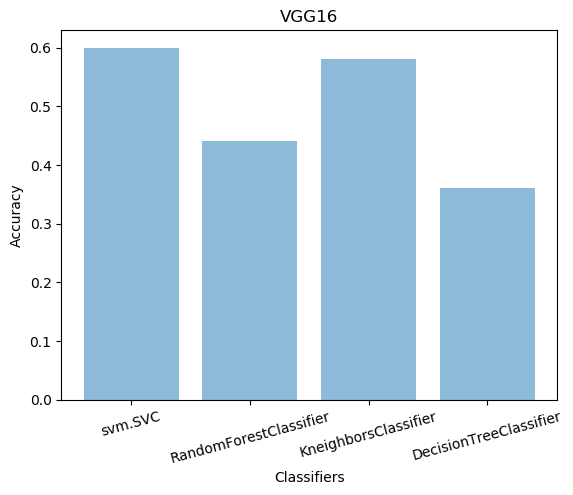

In [60]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import math

size = ['svm.SVC', 'RandomForestClassifier', 'KneighborsClassifier', 'DecisionTreeClassifier']
y_pos = np.arange(len(size))
acc = [0.6, 0.44, 0.58, 0.36]

plt.bar(y_pos, acc, align='center', alpha=0.5)
plt.xticks(y_pos, size, rotation=15)
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
plt.title('VGG16')

plt.show()

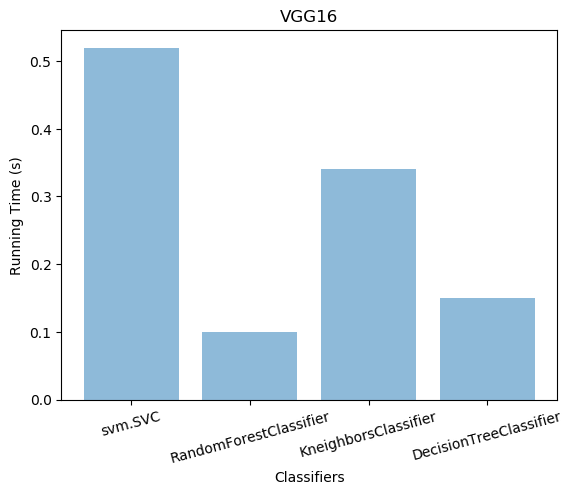

In [61]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import math

size = ['svm.SVC', 'RandomForestClassifier', 'KneighborsClassifier', 'DecisionTreeClassifier']
y_pos = np.arange(len(size))
acc = [0.52, 0.1, 0.34, 0.15]

plt.bar(y_pos, acc, align='center', alpha=0.5)
plt.xticks(y_pos, size, rotation=15)
plt.ylabel('Running Time (s)')
plt.xlabel('Classifiers')
plt.title('VGG16')

plt.show()

No handles with labels found to put in legend.


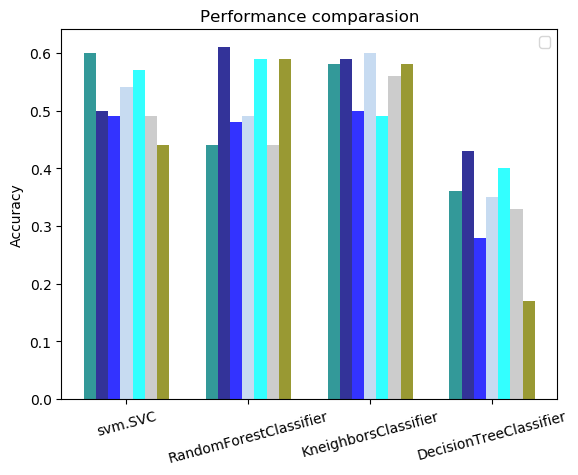

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
cls = ['svm.SVC', 'RandomForestClassifier', 'KneighborsClassifier', 'DecisionTreeClassifier']
acc_vgg16 = [0.6, 0.44, 0.58, 0.36]
acc_vgg19 = [0.5, 0.61, 0.59, 0.43]
acc_iv2 = [0.49, 0.48, 0.5, 0.28]
acc_resnet50 = [0.54, 0.49, 0.6, 0.35]
acc_xception = [0.57, 0.59, 0.49, 0.4]
acc_inceptionv3 = [0.49, 0.44, 0.56, 0.33]
acc_densenet201 = [0.44, 0.59, 0.58, 0.17]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, acc_vgg16, bar_width,
alpha=opacity,
color='#008080')
# label='vgg16')

rects2 = plt.bar(index + bar_width, acc_vgg19, bar_width,
alpha=opacity,
color='#000080')
# label='vgg19')

rects3 = plt.bar(index + 2*bar_width, acc_iv2, bar_width,
alpha=opacity,
color='#0000FF')
# label='InceptionResNetV2')

rects4 = plt.bar(index + 3*bar_width, acc_resnet50, bar_width,
alpha=opacity,
color='#B9D3EE')
# label='ResNet50')

rects4 = plt.bar(index + 4*bar_width, acc_xception, bar_width,
alpha=opacity,
color='#00FFFF')
# label='Xception')

rects4 = plt.bar(index + 5*bar_width, acc_inceptionv3, bar_width,
alpha=opacity,
color='#C0C0C0')
# label='InceptionV3')

rects4 = plt.bar(index + 6*bar_width, acc_densenet201, bar_width,
alpha=opacity,
color='#808000')
# label='DenseNet201')

# plt.xlabel('Number of samples')
plt.ylabel('Accuracy')
plt.title('Performance comparasion')
plt.xticks(index + bar_width*3, cls, rotation=15)
plt.legend()

# plt.tight_layout(pad=0.5, h_pad=100, w_pad=100, rect=None)
plt.show()

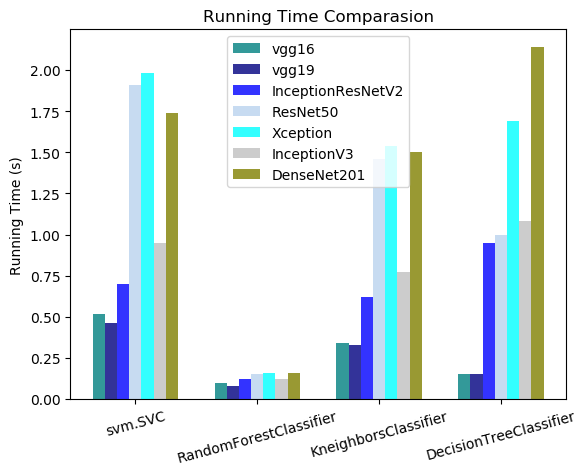

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
cls = ['svm.SVC', 'RandomForestClassifier', 'KneighborsClassifier', 'DecisionTreeClassifier']
acc_vgg16 = [0.52, 0.1, 0.34, 0.15]
acc_vgg19 = [0.46, 0.08, 0.33, 0.15]
acc_iv2 = [0.7, 0.12, 0.62, 0.95]
acc_resnet50 = [1.91, 0.15, 1.46, 1]
acc_xception = [1.98, 0.16, 1.54, 1.69]
acc_inceptionv3 = [0.95, 0.12, 0.77, 1.08]
acc_densenet201 = [1.74, 0.16, 1.5, 2.14]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, acc_vgg16, bar_width,
alpha=opacity,
color='#008080',
label='vgg16')

rects2 = plt.bar(index + bar_width, acc_vgg19, bar_width,
alpha=opacity,
color='#000080',
label='vgg19')

rects3 = plt.bar(index + 2*bar_width, acc_iv2, bar_width,
alpha=opacity,
color='#0000FF',
label='InceptionResNetV2')

rects4 = plt.bar(index + 3*bar_width, acc_resnet50, bar_width,
alpha=opacity,
color='#B9D3EE',
label='ResNet50')

rects4 = plt.bar(index + 4*bar_width, acc_xception, bar_width,
alpha=opacity,
color='#00FFFF',
label='Xception')

rects4 = plt.bar(index + 5*bar_width, acc_inceptionv3, bar_width,
alpha=opacity,
color='#C0C0C0',
label='InceptionV3')

rects4 = plt.bar(index + 6*bar_width, acc_densenet201, bar_width,
alpha=opacity,
color='#808000',
label='DenseNet201')

# plt.xlabel('Number of samples')
plt.ylabel('Running Time (s)')
plt.title('Running Time Comparasion')
plt.xticks(index + bar_width*3, cls, rotation=15)
plt.legend()

# plt.tight_layout(pad=0.5, h_pad=100, w_pad=100, rect=None)
plt.show()